In [1]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Concatenate
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 5.6MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219245 sha256=555084dd183b32e12e57f7618163d33c18970003a1082b6a322e54febcc157a2
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(3)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MKD, KDK, DKQ, KQK, QKK, KKK, KKK, KKE, KER, ..."
1,"[MSW, SWS, WSG, SGL, GLL, LLH, LHG, HGL, GLN, ..."
2,"[MSL, SLF, LFD, FDL, DLF, LFR, FRG, RGF, GFF, ..."
3,"[MAV, AVA, VAP, APR, PRL, RLF, LFG, FGG, GGL, ..."
4,"[MST, STI, TIQ, IQS, QSE, SET, ETD, TDC, DCY, ..."
...,...
6265,"[MSY, SYF, YFG, FGE, GEH, EHF, HFW, FWG, WGE, ..."
6266,"[MTV, TVG, VGK, GKS, KSS, SSK, SKM, KML, MLQ, ..."
6267,"[MNN, NNL, NLS, LSF, SFS, FSE, SEL, ELC, LCC, ..."
6268,"[MAP, APE, PEI, EIN, INL, NLP, LPG, PGP, GPM, ..."


Median length of Joined sequence is 877


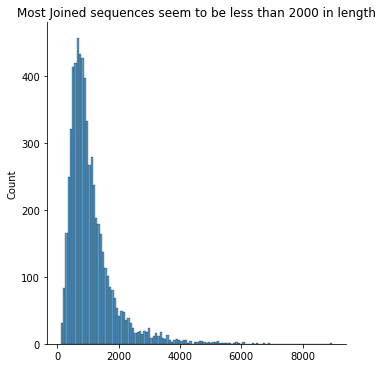

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 7000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8799
min sequence_data length: 103
median sequence_data length: 860


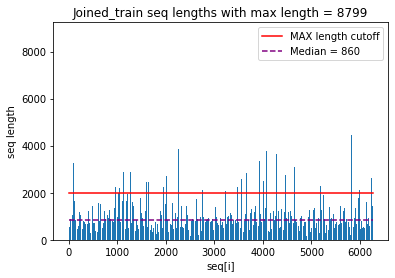

max word index: 6999
Found 8000 unique tokens.
pre padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 6020
min sequences_test length: 129
median sequences_test length: 883


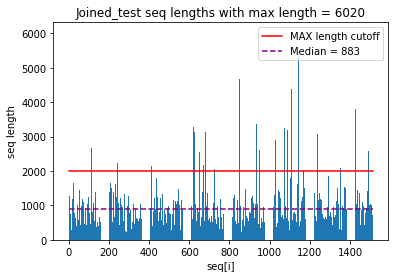

pre padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 7000


In [3]:
data_3D_join_pre,data_test_3D_join_pre,num_words_3D_join,MAX_SEQUENCE_LENGTH_3D,MAX_VOCAB_SIZE_3D = f.get_seq_data_join(7000,2000,df_train,df_test, pad='pre', show = True)

In [4]:
data_3D_join_center,data_test_3D_join_center,num_words_3D_join,MAX_SEQUENCE_LENGTH_3D,MAX_VOCAB_SIZE_3D = f.get_seq_data_join(7000,2000,df_train,df_test, pad='center')

MAX_VOCAB_SIZE is 7000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8799
min sequence_data length: 103
median sequence_data length: 860
max word index: 6999
Found 8000 unique tokens.
Center padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 6020
min sequences_test length: 129
median sequences_test length: 883
Center padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 7000


In [5]:
data_3D_join_post,data_test_3D_join_post,num_words_3D_join,MAX_SEQUENCE_LENGTH_3D,MAX_VOCAB_SIZE_3D = f.get_seq_data_join(7000,2000,df_train,df_test, pad='post')

MAX_VOCAB_SIZE is 7000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8799
min sequence_data length: 103
median sequence_data length: 860
max word index: 6999
Found 8000 unique tokens.
post padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 6020
min sequences_test length: 129
median sequences_test length: 883
post padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 7000


In [7]:

EMBEDDING_DIM_3D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10
M_3D=10


x1 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_3D, EMBEDDING_DIM_3D, num_words_3D_join, M_3D)
x2 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_3D, EMBEDDING_DIM_3D, num_words_3D_join, M_3D)
x3 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_3D, EMBEDDING_DIM_3D, num_words_3D_join, M_3D)

concatenator = Concatenate(axis=1)
x = concatenator([x1.output, x2.output, x3.output])
x = Dense(128)(x)
x = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model3D_join = Model(inputs=[x1.input, x2.input, x3.input], outputs=output)

model3D_join.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

trains = [data_3D_join_pre,data_3D_join_center,data_3D_join_post]
tests = [data_test_3D_join_pre,data_test_3D_join_center,data_test_3D_join_post]


jk = model3D_join.fit(trains,df_train['label'].values, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(tests,df_test['label'].values))
#plot_model(model3D_join, to_file='model_plot.png', show_shapes=True, show_layer_names=False)
print(roc_auc_score(df_test['label'].values, model3D_join.predict(tests)))

Epoch 1/10
49/49 [==============================] - 36s 582ms/step - loss: 0.9845 - accuracy: 0.5047 - val_loss: 0.6912 - val_accuracy: 0.6354
Epoch 2/10
49/49 [==============================] - 27s 547ms/step - loss: 0.6867 - accuracy: 0.5621 - val_loss: 0.7090 - val_accuracy: 0.5000
Epoch 3/10
49/49 [==============================] - 27s 549ms/step - loss: 0.5953 - accuracy: 0.6713 - val_loss: 0.5690 - val_accuracy: 0.7087
Epoch 4/10
49/49 [==============================] - 27s 552ms/step - loss: 0.3887 - accuracy: 0.8379 - val_loss: 0.5618 - val_accuracy: 0.7550
Epoch 5/10
49/49 [==============================] - 27s 554ms/step - loss: 0.2478 - accuracy: 0.9042 - val_loss: 0.5459 - val_accuracy: 0.7530
Epoch 6/10
49/49 [==============================] - 27s 554ms/step - loss: 0.1763 - accuracy: 0.9375 - val_loss: 0.6256 - val_accuracy: 0.7490
Epoch 7/10
49/49 [==============================] - 27s 558ms/step - loss: 0.1536 - accuracy: 0.9370 - val_loss: 0.6381 - val_accuracy: 0.7576

In [ ]:
#0.8271543969189371

In [ ]:
#model3D_join.save('/content/drive/MyDrive/ML_Data/model3D_join.h5')